In [2]:
import preliz as pz
from matplotlib import pyplot as plt

In [3]:
%matplotlib widget

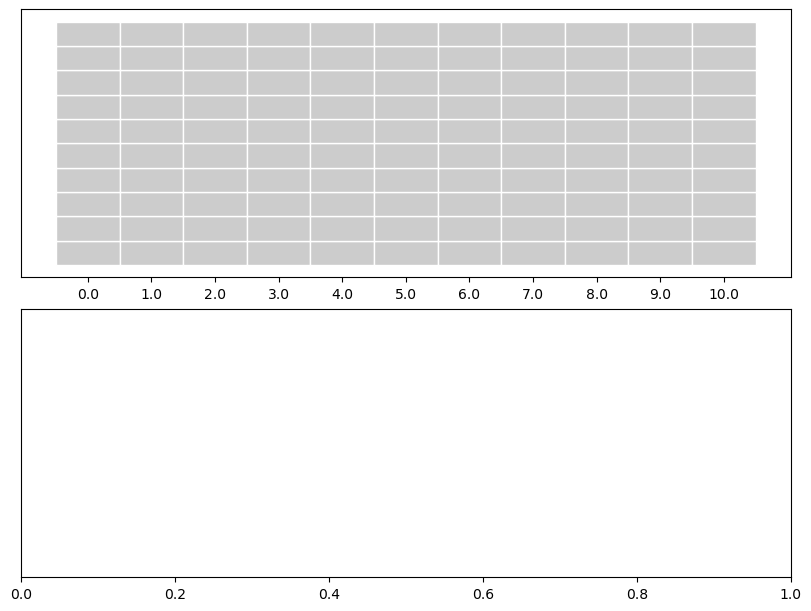

In [4]:
pz.roulette()

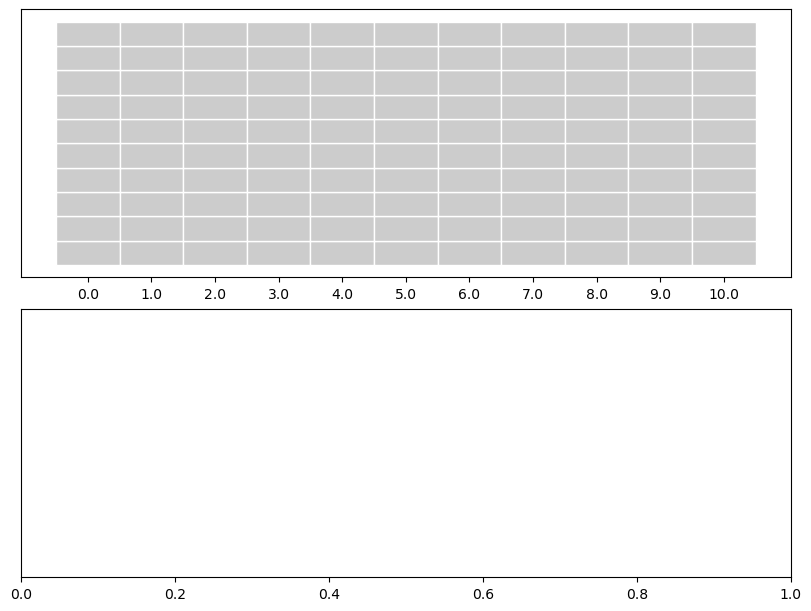

Beta(mean=0.6, median=0.6, std=0.08, lower=0.45, upper=0.74)

In [5]:
prob_frown=pz.Beta(alpha=24, beta=16)
plt.show()
prob_frown.summary()

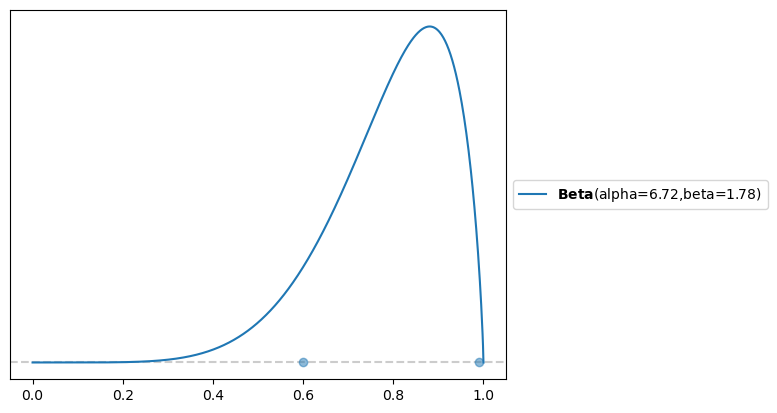

Beta(alpha=6.72,beta=1.78)

No such comm: ff8f653af63c40ea9cf6f5b9c97d1276


In [6]:
import numpy as np
#
plt.close()
prob_smile= pz.Beta()
pz.maxent(prob_smile, lower=.60, upper=.99, mass=.90,);
plt.show()
prob_smile



In [7]:
import numpy as np
import pymc as pm
import xarray as xr


In [8]:

smiles = pm.BetaBinomial.dist(alpha=prob_smile.alpha,beta=prob_smile.beta, n=10, shape=100)
print(smiles.eval())
frowns = pm.BetaBinomial.dist(alpha=prob_frown.alpha, beta=prob_frown.beta, n=10-smiles, shape=100)
print(frowns.eval())

print((smiles+frowns).eval())

[ 6  9 10  9 10 10 10  3  9  6  9 10  8  9  6  9  3  5  6  6  9 10  9  6
  5  7  6  8  7  7 10 10  9  5  8  7 10  6  5  5 10 10  7  9  9 10  5  6
  3  9  7  9  9  8  7  9 10 10  7  9  6  2  9  8  8 10  7 10  7  5  6  7
  7  8  5  6  9  6  8  7  5  8  7  9 10  7  8  6  9  5  7  9  5  8  9 10
  7  7  9  8]
[2 1 0 1 0 0 0 3 1 3 1 0 1 0 2 1 6 4 2 3 0 0 0 3 2 1 1 0 1 1 0 0 0 2 1 2 0
 1 4 5 0 0 2 1 1 0 2 4 7 1 1 1 1 1 1 0 0 0 0 1 3 3 1 1 2 0 2 0 3 3 3 2 1 0
 2 4 1 3 1 2 3 2 3 0 0 1 1 3 0 1 2 0 2 0 0 0 2 3 1 0]
[ 8 10 10 10 10 10 10  6 10  9 10 10  9  9  8 10  9  9  8  9  9 10  9  9
  7  8  7  8  8  8 10 10  9  7  9  9 10  7  9 10 10 10  9 10 10 10  7 10
 10 10  8 10 10  9  8  9 10 10  7 10  9  5 10  9 10 10  9 10 10  8  9  9
  8  8  7 10 10  9  9  9  8 10 10  9 10  8  9  9  9  6  9  9  7  8  9 10
  9 10 10  8]


In [9]:


time = np.arange(0, 100) * 10  # 100 data points separated in time by 10 seconds
lat_seed = np.linspace(-90, 90, 1)  # example latitude values
lon_seed = np.linspace(-180, 180, 1)  # example longitude values
altitude_seed = np.linspace(0, 1000, 1)  # example altitude values
coord_stack=[lat_seed,lon_seed,altitude_seed]
# Generate random differences between each successive data point
differences = np.random.rand(100,3)

# Calculate the cumulative sum of the differences to get the final values
coord_add_values = np.cumsum(differences, axis=0)
coord_stack+=coord_add_values.T
(lat,lon,altitude)=coord_stack

butterfly_flight = xr.DataArray(
    np.array([smiles.eval(),frowns.eval()]),  # example random data with differences
    dims=['expression', "time", ],
    coords={'expression': ["smiles","frowns"],"time": time, "lat": ('time', lat), "lon": ('time',lon), "altitude": ('time',altitude)},
)
butterfly_flight

<xarray.DataArray (expression: 2, time: 100)>
array([[ 6,  9, 10,  9, 10, 10, 10,  3,  9,  6,  9, 10,  8,  9,  6,  9,
         3,  5,  6,  6,  9, 10,  9,  6,  5,  7,  6,  8,  7,  7, 10, 10,
         9,  5,  8,  7, 10,  6,  5,  5, 10, 10,  7,  9,  9, 10,  5,  6,
         3,  9,  7,  9,  9,  8,  7,  9, 10, 10,  7,  9,  6,  2,  9,  8,
         8, 10,  7, 10,  7,  5,  6,  7,  7,  8,  5,  6,  9,  6,  8,  7,
         5,  8,  7,  9, 10,  7,  8,  6,  9,  5,  7,  9,  5,  8,  9, 10,
         7,  7,  9,  8],
       [ 2,  1,  0,  1,  0,  0,  0,  3,  1,  3,  1,  0,  1,  0,  2,  1,
         6,  4,  2,  3,  0,  0,  0,  3,  2,  1,  1,  0,  1,  1,  0,  0,
         0,  2,  1,  2,  0,  1,  4,  5,  0,  0,  2,  1,  1,  0,  2,  4,
         7,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  3,  3,  1,  1,
         2,  0,  2,  0,  3,  3,  3,  2,  1,  0,  2,  4,  1,  3,  1,  2,
         3,  2,  3,  0,  0,  1,  1,  3,  0,  1,  2,  0,  2,  0,  0,  0,
         2,  3,  1,  0]])
Coordinates:
  * expression  (expression) <U6 'smiles' 'frowns'
  * time        (time) int64 0 10 20 30 40 50 60 ... 930 940 950 960 970 980 990
    lat         (time) float64 -89.97 -89.2 -88.37 -88.12 ... -41.0 -40.6 -39.66
    lon         (time) float64 -179.9 -179.4 -178.9 ... -126.5 -125.6 -125.2
    altitude    (time) float64 0.2422 0.9408 0.9619 1.23 ... 46.0 46.51 46.81

In [12]:
with pm.Model() as dim_import_test:
    data_smiles = pm.Data('smiles_obs',butterfly_flight['expression'=='smiles'],mutable=True,infer_dims_and_coords=True)
    data_frowns = pm.Data('frowns_obs',butterfly_flight['expression'=='frowns'],mutable=True,infer_dims_and_coords=True)
    smile_alpha = pm.HalfCauchy('smile_alpha', beta=prob_smile.alpha)
    smile_beta = pm.HalfCauchy('smile_beta', beta=prob_smile.beta)
    frown_alpha = pm.HalfCauchy('frown_alpha', beta=prob_frown.alpha)
    frown_beta = pm.HalfCauchy('frown_beta', beta=prob_frown.beta)


    smiles = pm.BetaBinomial('smiles', alpha=smile_alpha, beta=smile_beta, n=10, observed=data_smiles)
    frowns = pm.BetaBinomial('frowns', alpha=frown_alpha, beta=frown_beta, n=10, observed=data_frowns)

    trace = pm.sample(1000, tune=1000, cores=1, chains=1, return_inferencedata=True)

    


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [smile_alpha, smile_beta, frown_alpha, frown_beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 3 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
